In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [20]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D,MaxPooling2D, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras import Sequential
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3, Xception
import os
import matplotlib.pyplot as plt
from PIL import Image
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split



2025-08-23 21:48:08.177001: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755985688.347379      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755985688.396150      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
train_dir = "/kaggle/input/gtsrb-german-traffic-sign/Train"

images = []
labels = []

for class_id in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_id)
    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)   
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
            images.append(img)
            labels.append(int(class_id))  

images = np.array(images, dtype=object)   
labels = np.array(labels)

print(" Number Of Photo:", len(images))
print("Label shape:", labels.shape)
print("Size is:", images[0].shape)


 Number Of Photo: 39209
Label shape: (39209,)
Size is: (46, 44, 3)


In [7]:
for i in range (10):
    print(images[i].shape)

(46, 44, 3)
(53, 53, 3)
(27, 26, 3)
(31, 31, 3)
(40, 41, 3)
(27, 28, 3)
(37, 36, 3)
(37, 37, 3)
(32, 30, 3)
(68, 67, 3)


In [8]:
target_size = (32, 32)   

resized_images = []
for img in images:
    resized = cv2.resize(img, target_size)
    resized_images.append(resized)

resized_images = np.array(resized_images, dtype=np.float32) / 255.0  # Normalize
labels = np.array(labels)

print("Resized images shape:", resized_images.shape)


Resized images shape: (39209, 32, 32, 3)


In [10]:
num_classes = len(np.unique(labels))
print("num_classes:", num_classes)


num_classes: 43


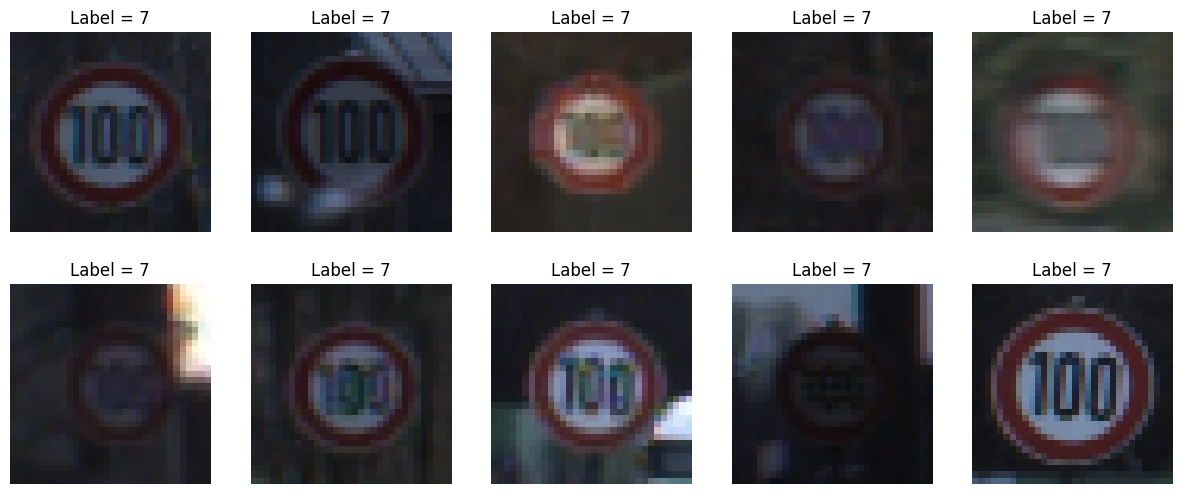

In [18]:
plt.figure(figsize=(15,6))

for i in range(10):
    plt.subplot(2, 5, i+1)   
    plt.imshow(resized_images[i])
    plt.title(f"Label = {labels[i]}")
    plt.axis("off")

plt.show()

In [25]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu',padding="same"),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu',padding="same"),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(256, (3, 3), activation='relu',padding="same"),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),

    Dense(43, activation='softmax')
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 3, 3, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 43)             │        22,059 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 542,059 (2.07 MB)

 Trainable params: 542,059 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    resized_images, labels, 
    test_size=0.2,   # 20% test
    random_state=42,
    stratify=labels  
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)


Train shape: (31367, 32, 32, 3) (31367,)
Test shape: (7842, 32, 32, 3) (7842,)


In [26]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history_cnn=history = model.fit(X_train, y_train,
    validation_split=0.2,   
    epochs=10,
    batch_size=32,
    verbose=1
)


Epoch 1/10


I0000 00:00:1755986024.591294     104 service.cc:148] XLA service 0x7c023400d310 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1755986024.591747     104 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1755986024.945799     104 cuda_dnn.cc:529] Loaded cuDNN version 90300


 49/785 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0610 - loss: 3.6217

I0000 00:00:1755986027.325571     104 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


785/785 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.2556 - loss: 2.6608 - val_accuracy: 0.8208 - val_loss: 0.5191
Epoch 2/10
785/785 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8708 - loss: 0.3961 - val_accuracy: 0.9517 - val_loss: 0.1555
Epoch 3/10
785/785 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9600 - loss: 0.1261 - val_accuracy: 0.9788 - val_loss: 0.0703
Epoch 4/10
785/785 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9783 - loss: 0.0694 - val_accuracy: 0.9836 - val_loss: 0.0567
Epoch 5/10
785/785 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9802 - loss: 0.0623 - val_accuracy: 0.9756 - val_loss: 0.0852
Epoch 6/10
785/785 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9883 - loss: 0.0386 - val_accuracy: 0.9821 - val_loss: 0.0547
Epoch 7/10
785/785 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9878 - loss: 0.0423 - val_accuracy: 0.9857 - val_loss: 0.0483
Epoch 8/10
785/785 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9928 - loss: 0.0226 - val_accuracy: 0.9884 - val

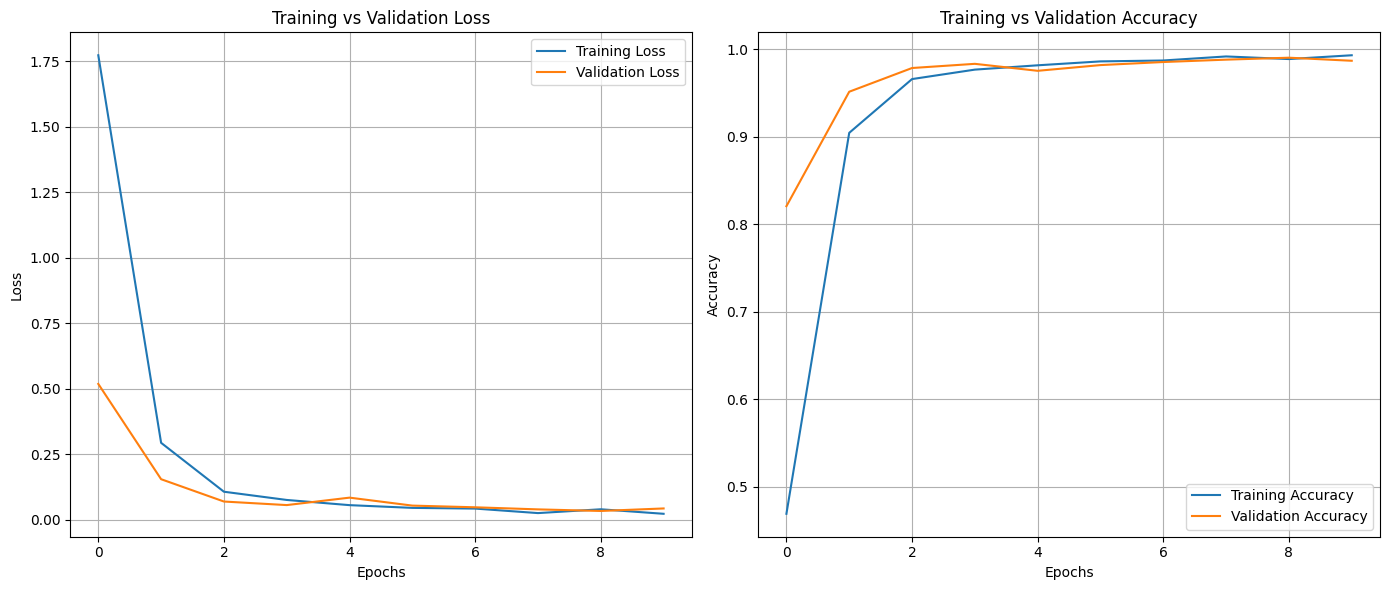

In [29]:
history = history_cnn

# Create subplots (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(14,6))

# -------- Loss subplot --------
axs[0].plot(history.history['loss'], label='Training Loss')
axs[0].plot(history.history['val_loss'], label='Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].set_title('Training vs Validation Loss')
axs[0].legend()
axs[0].grid(True)

# -------- Accuracy subplot --------
axs[1].plot(history.history['accuracy'], label='Training Accuracy')
axs[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].set_title('Training vs Validation Accuracy')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()


246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


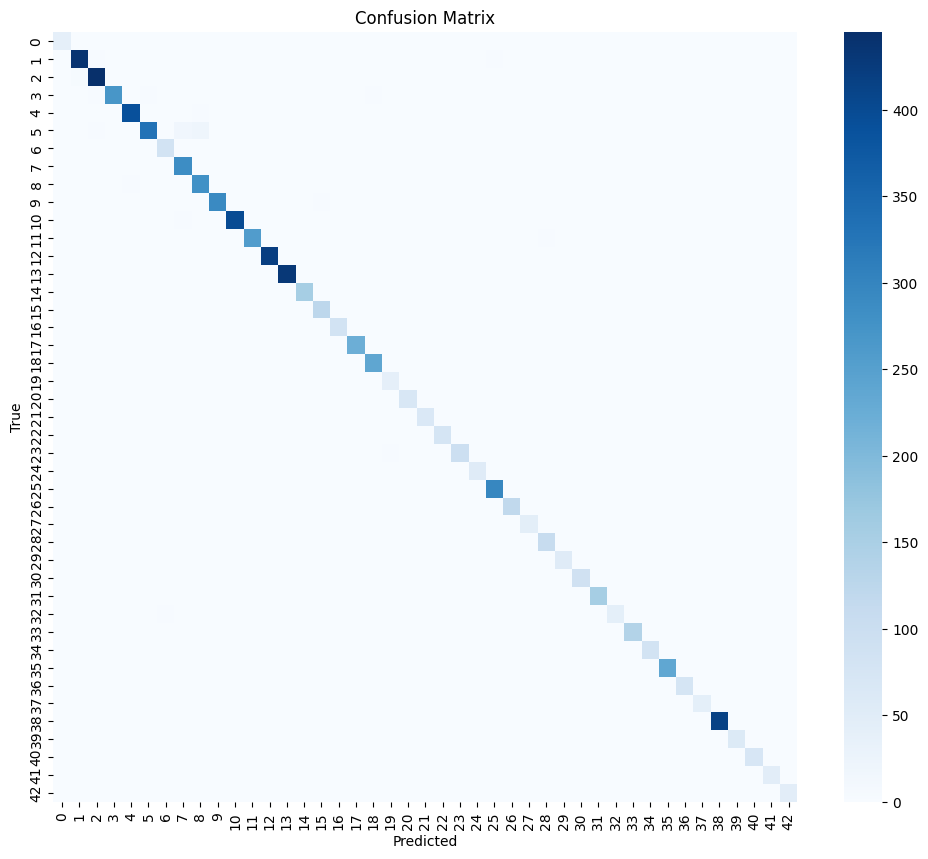

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        42
           1       0.98      0.99      0.98       444
           2       0.98      0.99      0.99       450
           3       1.00      0.96      0.98       282
           4       0.99      0.98      0.99       396
           5       0.99      0.89      0.94       372
           6       0.98      1.00      0.99        84
           7       0.93      0.99      0.96       288
           8       0.91      0.99      0.95       282
           9       1.00      0.99      1.00       294
          10       1.00      0.99      1.00       402
          11       1.00      0.98      0.99       264
          12       1.00      1.00      1.00       420
          13       1.00      1.00      1.00       432
          14       0.99      1.00      1.00       156
          15       0.97      0.99      0.98       126
          16       1.00      1.00      1.00        84
          17       1.00    

In [30]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)   
y_true = y_test                             

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=False, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# --- Classification Report ---
print(classification_report(y_true, y_pred_classes))


# Bonus

In [31]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [32]:
# -------- Parameters --------
train_dir = "/kaggle/input/gtsrb-german-traffic-sign/Train"
img_size = (224, 224)
batch_size = 32
num_classes = 43

# -------- Data Augmentation --------
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse',
    subset='training',
    shuffle=True
)

val_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse',
    subset='validation',
    shuffle=False
)

Found 31368 images belonging to 43 classes.
Found 7841 images belonging to 43 classes.


In [33]:
# -------- MobileNetV2 Base --------
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False  # Freeze the base

# -------- Add Classification Head --------
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)



9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [35]:
# -------- MobileNetV2 Base --------

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
for layer in base_model.layers:
    layer.trainable = False

n = 10
for layer in base_model.layers[-n:]:
    layer.trainable = True

# -------- Add Classification Head --------
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# -------- Compile --------
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# -------- Train --------
history2 = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)


Epoch 1/10


E0000 00:00:1755987901.228902     102 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1755987901.425756     102 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


981/981 ━━━━━━━━━━━━━━━━━━━━ 418s 412ms/step - accuracy: 0.4559 - loss: 1.9754 - val_accuracy: 0.3044 - val_loss: 7.2404
Epoch 2/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 394s 402ms/step - accuracy: 0.7332 - loss: 0.8358 - val_accuracy: 0.5552 - val_loss: 2.6379
Epoch 3/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 395s 403ms/step - accuracy: 0.7983 - loss: 0.6272 - val_accuracy: 0.6212 - val_loss: 2.2330
Epoch 4/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 394s 402ms/step - accuracy: 0.8229 - loss: 0.5433 - val_accuracy: 0.7129 - val_loss: 1.2346
Epoch 5/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 394s 402ms/step - accuracy: 0.8498 - loss: 0.4653 - val_accuracy: 0.6889 - val_loss: 1.6935
Epoch 6/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 396s 404ms/step - accuracy: 0.8628 - loss: 0.4245 - val_accuracy: 0.6997 - val_loss: 1.3830
Epoch 7/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 398s 405ms/step - accuracy: 0.8777 - loss: 0.3825 - val_accuracy: 0.7076 - val_loss: 1.4554
Epoch 8/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 402s 410ms/step - accuracy: 0.8889 - loss: 0.34

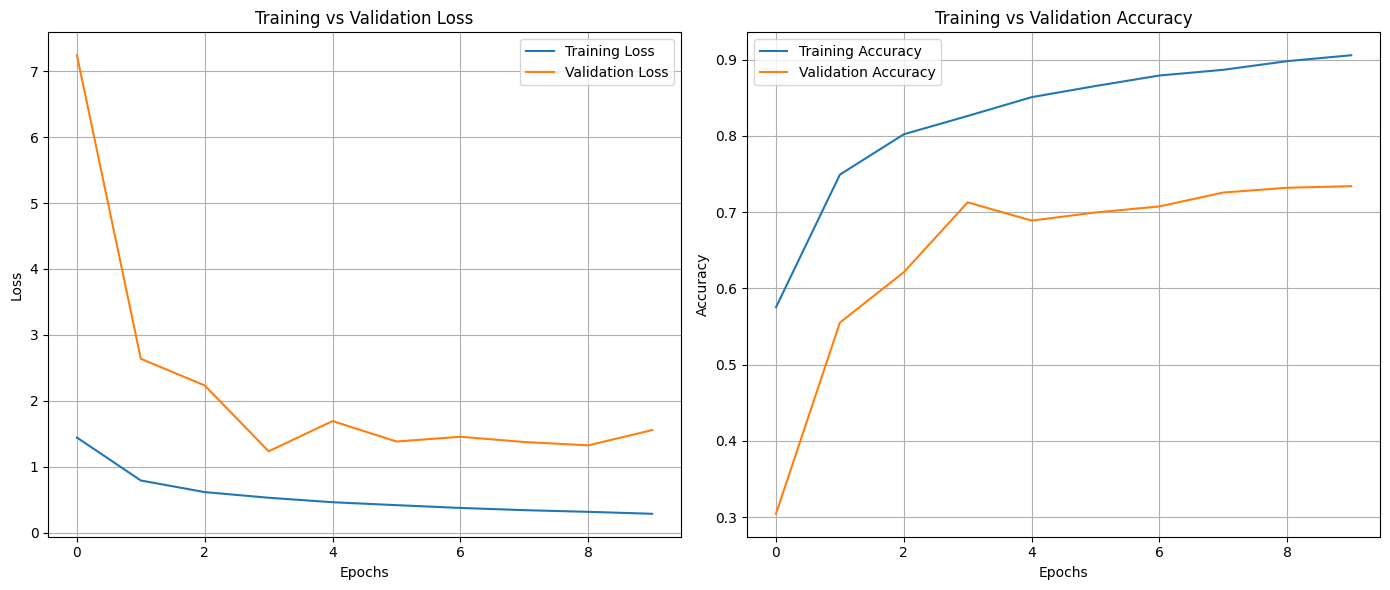

246/246 ━━━━━━━━━━━━━━━━━━━━ 85s 332ms/step


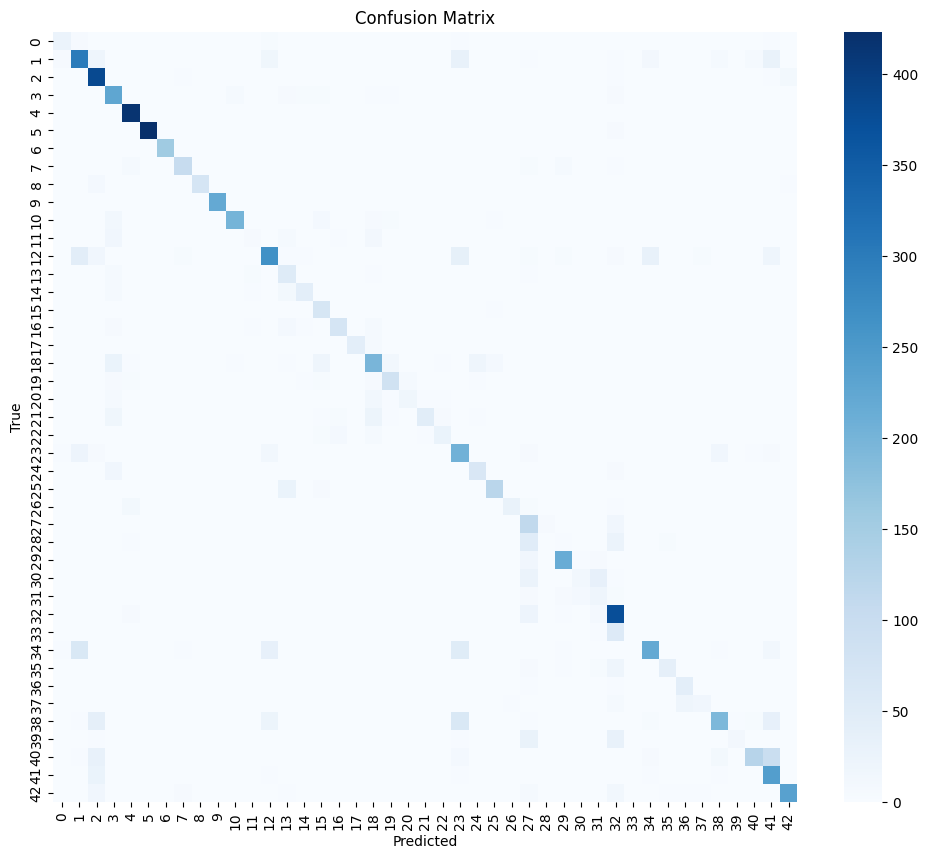

              precision    recall  f1-score   support

           0       0.68      0.62      0.65        42
           1       0.67      0.68      0.68       444
           2       0.70      0.95      0.80       402
           3       0.65      0.86      0.74       264
           4       0.92      0.99      0.95       420
           5       0.99      0.98      0.98       432
           6       1.00      1.00      1.00       156
           7       0.87      0.82      0.84       126
           8       0.97      0.87      0.92        84
           9       0.99      1.00      0.99       222
          10       0.95      0.84      0.89       240
          11       0.33      0.12      0.18        42
          12       0.73      0.59      0.65       450
          13       0.42      0.74      0.54        72
          14       0.76      0.64      0.69        66
          15       0.59      0.91      0.71        78
          16       0.79      0.73      0.76       102
          17       0.98    

In [36]:
# -------- Plot Loss and Accuracy --------
fig, axs = plt.subplots(1, 2, figsize=(14,6))

# Loss
axs[0].plot(history2.history['loss'], label='Training Loss')
axs[0].plot(history2.history['val_loss'], label='Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].set_title('Training vs Validation Loss')
axs[0].legend()
axs[0].grid(True)

# Accuracy
axs[1].plot(history2.history['accuracy'], label='Training Accuracy')
axs[1].plot(history2.history['val_accuracy'], label='Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].set_title('Training vs Validation Accuracy')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

# -------- Confusion Matrix --------
# Predict on validation set
val_gen.reset()
y_pred = model.predict(val_gen)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_gen.classes

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=False, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_true, y_pred_classes))
